# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


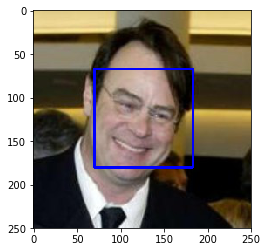

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 


The face detector detected 98% images correctly as humans in the human dataset, whereas the percentage of humans detected in dog dataset was 17%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces=[]
dog_faces=[]

for human,dog in tqdm(zip(human_files_short,dog_files_short)):
    human_faces.append(face_detector(human))
    dog_faces.append(face_detector(dog))

human_score= np.sum(human_faces)/len(human_faces)
dog_score= np.sum(dog_faces)/len(dog_faces)

print('Human faces accurately detected is {:.2f}% in the first 100 images in human_files.'.format(human_score*100))
print('Dog faces detected inaccurately as humans is {:.2f}% in the first 100 images in dog_files.'.format(dog_score*100))

100it [00:44,  5.63it/s]

Human faces accurately detected is 98.00% in the first 100 images in human_files.
Dog faces detected inaccurately as humans is 17.00% in the first 100 images in dog_files.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [81]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [82]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #Convert the open image to RGB
    image= Image.open(img_path).convert('RGB')
    
    #data transformation and normalization
    
    transform= transforms.Compose([transforms.Resize(224),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485,0.456,0.406],
                                                       std=[0.229,0.224,0.225])])
    
    #Applying transformation to the image and adding extra batch dimension with the new returned tensor                             
    image= transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        image= image.cuda()
    
    prediction= VGG16(image)
    
    #Returning index of class label with maximum value
    return torch.max(prediction,1)[1].item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [83]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction= VGG16_predict(img_path)
    
    return ((prediction <= 268) & (prediction >= 151))# true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


The dog detector detected 100% images correctly as dogs in the dog dataset, whereas the percentage of humans detected as dogs is 0%.

In [84]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_faces=[]
dogs=[]

for human,dog in zip(human_files_short,dog_files_short):
    human_faces.append(dog_detector(human))
    dogs.append(dog_detector(dog))

print(f'Percentage of humans detected as dogs is: {np.sum(human_faces)/len(human_faces):.2%}')    
print(f'Percentage of dogs detected accurately is: {np.sum(dogs)/len(dogs):.2%}') 

Percentage of humans detected as dogs is: 0.00%
Percentage of dogs detected accurately is: 100.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torchvision.transforms as transforms


#Using data augmentation for training and validation during transforms

image_transforms={'train':transforms.Compose([
                          transforms.RandomResizedCrop(size=224,scale=(0.8,1.0)),
                          transforms.RandomRotation(degrees=45),
                          transforms.RandomVerticalFlip(p=0.4),
                          transforms.RandomHorizontalFlip(p=0.3),
                          transforms.CenterCrop(size=224),
                          transforms.ToTensor(),
                          transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]),
                  
                  'valid':transforms.Compose([
                          transforms.RandomResizedCrop(size=224,scale=(0.8,1.0)),
                          transforms.RandomRotation(degrees=20),
                          transforms.RandomVerticalFlip(p=0.4),
                          transforms.RandomHorizontalFlip(p=0.3),
                          transforms.CenterCrop(size=224),
                          transforms.ToTensor(),
                          transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]),
                  
                  #No test data augmentation 
                  'test': transforms.Compose([
                          transforms.Resize(224),
                          transforms.CenterCrop(size=224),
                          transforms.ToTensor(),
                          transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])])
                 }

data_dir='/data/dog_images/'

train_path=os.path.join(data_dir,'train')
valid_path=os.path.join(data_dir,'valid')
test_path=os.path.join(data_dir,'test')

#Datasets

train_dataset=datasets.ImageFolder(train_path,transform=image_transforms['train'])
valid_dataset=datasets.ImageFolder(valid_path,transform=image_transforms['valid'])
test_dataset=datasets.ImageFolder(test_path,transform=image_transforms['test'])

#Dataloaders

data_loaders={
    'train':torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True),
    'valid':torch.utils.data.DataLoader(valid_dataset,batch_size=64,shuffle=True),
    'test': torch.utils.data.DataLoader(test_dataset,batch_size=32, shuffle=False)
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I have applied data augmentation during both training and validation. For transformation, I have used RandomResizedCrop of size 224,  RandomRotation of 20 degrees, RandomHorizontalFlip with probability 0.3, RandomVerticalFlip with probability 0.4, RandomResizedCrop with scale(0.8,1.0) and size 224. The images have been center cropped with size 224x224 pixels and normalized to the above mean and standard deviation. The idea is to make the model learn better using augmentation, so that it performs reasonably well during testing. The output of these transforms are tensors that we will feed our network.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):

        ## Define layers of a CNN
        super(Net, self).__init__()
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3)
        # convolutional layer (sees 112x112x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3)
        # convolutional layer (sees 56x56x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)
        #fully connected layer
        self.fc1 = nn.Linear(256 * 6 * 6, 133)
        
        #Maxpooling
        self.max_pool = nn.MaxPool2d(2, 2, ceil_mode=True)
        
        #Dropout layer of 0.2
        self.dropout = nn.Dropout(0.2)
        
        #Using Batch Normalization 
        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
    
        
    def forward(self, x):
        #1st convolutional layer
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.conv_bn2(x)
        
        #2nd convolutional layer
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.conv_bn3(x)
        
        #3rd convolutional layer
        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.conv_bn4(x)
        
        #4th convolutional layer
        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.conv_bn5(x)
        
        #5th convolutional layer
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.conv_bn6(x)
        
        #Flatten image output
        x = x.view(-1, 256 * 6 * 6)
        
        x = self.dropout(x)
        x = self.fc1(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- My CNN architecture consists of 5 convolutional layers and 1 fully connected layer. The idea being that the more convolutional layers are included, the more complex patterns in color, size, and shape a model can detect better.
- The first layer has input size of (224, 224, 3) and last layer has output size of 133 classes. 
- I have used MaxPooling layer of kernel size 2x2. MaxPooling2D is a common choice to downsample in these kind of classification problems and hence I chose this technique. 
- This architecture is constructed with a series of convolutional layers, a fully connected layer, followed by a Max Pooling Layer. Each convolutional layer changes the output of the previous layer to generate a new set of filters.
- I have used dropout layers with probability 0.2 to avoid overfitting.
- Next , I have introduced batch normalization as a complement with dropout. Similar to dropout, batch normalization reduces overfitting because it has slight regularization effects. 
- Finally, the feed forward network consists of ReLU activations at each convolutional layer, followed with max pooling and batch normalization. The 'Max-Pooling Layer' reduces the filter size which increases the speed of training. Moreover, an added benefit of max pooling is that it forces the network to focus on a few neurons instead of all of them which has a regularizing effect on the network, making it less likely to overfit the training data and hopefully generalize well. Batch normalization normalizes the output of the previous activation layer by subtracting the batch mean and dividing by the batch standard deviation. This increases the stability of the neural network. Overall, it is a good technique to do preprocessing at every layer of the network, hence helping to build a better network.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # calculate average losses
        train_loss = train_loss/len(train_dataset)
        valid_loss = valid_loss/len(valid_dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss <= valid_loss_min :
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model


# train the model
model_scratch = train(20, data_loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000731 	Validation Loss: 0.005595
Validation loss decreased (inf --> 0.005595).  Saving model ...
Epoch: 2 	Training Loss: 0.000677 	Validation Loss: 0.005233
Validation loss decreased (0.005595 --> 0.005233).  Saving model ...
Epoch: 3 	Training Loss: 0.000606 	Validation Loss: 0.004929
Validation loss decreased (0.005233 --> 0.004929).  Saving model ...
Epoch: 4 	Training Loss: 0.000550 	Validation Loss: 0.004717
Validation loss decreased (0.004929 --> 0.004717).  Saving model ...
Epoch: 5 	Training Loss: 0.000517 	Validation Loss: 0.004703
Validation loss decreased (0.004717 --> 0.004703).  Saving model ...
Epoch: 6 	Training Loss: 0.000480 	Validation Loss: 0.004561
Validation loss decreased (0.004703 --> 0.004561).  Saving model ...
Epoch: 7 	Training Loss: 0.000450 	Validation Loss: 0.004375
Validation loss decreased (0.004561 --> 0.004375).  Saving model ...
Epoch: 8 	Training Loss: 0.000423 	Validation Loss: 0.004430
Epoch: 9 	Training Loss: 0.000399 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(data_loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.730447


Test Accuracy: 22% (187/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders

image_transforms={'train': transforms.Compose([
                            transforms.RandomResizedCrop(224),
                            transforms.RandomHorizontalFlip(),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                            ]),
                            'valid': transforms.Compose([
                            transforms.Resize(224),
                            transforms.CenterCrop(224),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                            ]),
                  #No test data augmentation 
                          'test': transforms.Compose([
                          transforms.Resize(224),
                          transforms.CenterCrop(size=224),
                          transforms.ToTensor(),
                          transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])])
                             }

data_dir='/data/dog_images/'

train_path=os.path.join(data_dir,'train')
valid_path=os.path.join(data_dir,'valid')
test_path=os.path.join(data_dir,'test')

#Datasets

train_dataset=datasets.ImageFolder(train_path,transform=image_transforms['train'])
valid_dataset=datasets.ImageFolder(valid_path,transform=image_transforms['valid'])
test_dataset=datasets.ImageFolder(test_path,transform=image_transforms['test'])

#Dataloaders

data_loaders={
    'train':torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True),
    'valid':torch.utils.data.DataLoader(valid_dataset,batch_size=64,shuffle=True),
    'test': torch.utils.data.DataLoader(test_dataset,batch_size=64, shuffle=False)
}

loaders_transfer=data_loaders

Using a different dataloader from the previous step

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# defining DENSENET121 model
model_transfer = models.densenet121(pretrained=True)

#freezing pretrained model weights

for param in model_transfer.parameters():
    param.requires_grad=False

input_features= model_transfer.classifier.in_features

model_transfer.classifier= nn.Linear(input_features,133)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [24]:
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- I loaded the pretrained models which have been trained on a large dataset like ImageNet. 
- Our dataset is small, and hence it comes under the transfer learning use case where last fully connected layer of pre-trained network has been used to construct a new fully connected layer.
- To avoid overfitting on our data set, the weights of the original network has been frozen. Hence, only the weights of the new fully connected layer will be updated during training.
- I tried several architectures such as densenet121, resnet50 and vgg16. Every pretrained model demonstrated different level of accuracy based on the parameters we choose to train on. My curiosity on this one stuck with densenet121. After researching on the internet and reading different articles, I decided to try a complex architecture and wanted to play with it. DenseNets require fewer parameters than an equivalent traditional CNN, as there is no need to learn redundant feature maps. The problems arise with CNNs when they go deeper. This is because the path for information from the input layer until the output layer becomes huge such that they can get vanished before reaching the other side. DenseNets simplify the connectivity pattern between layers. Hence, I decided to go with densenet121 and tried various optimizers and loss fuctions to determine the most suitable combination. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [26]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.001,momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [27]:
# train the model
model_transfer = train(50, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000695 	Validation Loss: 0.004938
Validation loss decreased (inf --> 0.004938).  Saving model ...
Epoch: 2 	Training Loss: 0.000591 	Validation Loss: 0.004153
Validation loss decreased (0.004938 --> 0.004153).  Saving model ...
Epoch: 3 	Training Loss: 0.000504 	Validation Loss: 0.003334
Validation loss decreased (0.004153 --> 0.003334).  Saving model ...
Epoch: 4 	Training Loss: 0.000437 	Validation Loss: 0.002858
Validation loss decreased (0.003334 --> 0.002858).  Saving model ...
Epoch: 5 	Training Loss: 0.000385 	Validation Loss: 0.002443
Validation loss decreased (0.002858 --> 0.002443).  Saving model ...
Epoch: 6 	Training Loss: 0.000343 	Validation Loss: 0.002135
Validation loss decreased (0.002443 --> 0.002135).  Saving model ...
Epoch: 7 	Training Loss: 0.000311 	Validation Loss: 0.001997
Validation loss decreased (0.002135 --> 0.001997).  Saving model ...
Epoch: 8 	Training Loss: 0.000285 	Validation Loss: 0.001662
Validation loss decreased (0.00199

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.523544


Test Accuracy: 86% (726/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [39]:
class_names=train_dataset.classes
print(len(class_names))

133


In [103]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img=Image.open(img_path)
    
    transform=transforms.Compose([ transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    #from image to tensor
    image_tensor = transform(img).float()
    #adds a dimension with a length of one
    image_tensor = image_tensor.unsqueeze_(0)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]

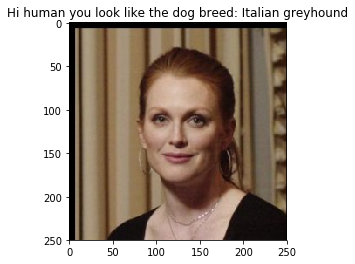

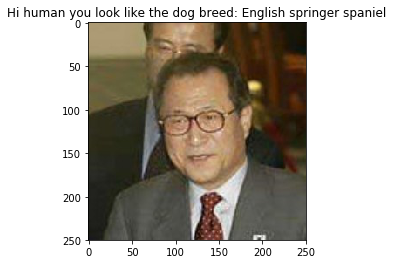

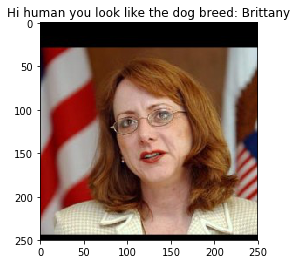

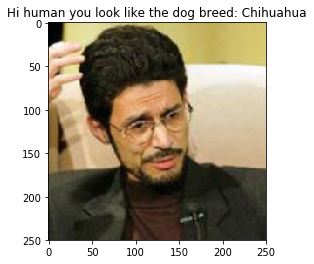

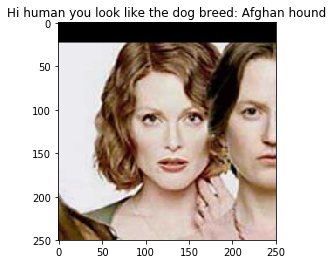

In [104]:
def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

import random 

# trying the function in above cell and the above display_image function
for image in random.sample(list(human_files_short), 5): 
    predicted_breed = predict_breed_transfer(image)
    display_image(image, title="Hi human you look like the dog breed: {}".format(predicted_breed) )

In [102]:
predict_breed_transfer(dog_files_short[12])

'Bullmastiff'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [108]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    
    ## converting image to RGB color 
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # displaying the image
    plt.imshow(rgb_image)
    
    
    if (face_detector(img_path)):
        print("Hi human!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("You resemble the dog breed ")
        print(predicted_breed)
        
    # checking if image has dogs:
    elif dog_detector(img_path):
        print("Hi Dog!")
        predicted_breed2 = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed2) )
        
        print("Your breed is ")
        print(predicted_breed2)
    # no human or dog
    else:
        print("Nope, give me a dog or human face image.")
        display_image(img_path, title="...")
        print("Try a different image!")
        
    print("\n")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- The output is accurate as expected. It was an interesting task at hand. I am a big fan of accuracy, so I would want to explore more options and ways to achieve maximum accuracy (somewhere around 95%). One of the ways to achieve this would be using scheduler, which can be used to decay the learning rate over time. Torch.vision documentation provides different types of schedulers to experiment with and it would be fun to try those. Also, I read that resnet50 works well with more than 90% accuracy. So, I can surely experiment with that.
- To select the best model more efficiently, k-fold Cross-Validation could be tried. Thus, we would be able to retain the model with best validation score and discard the other models.
- I would also want to find possible ways to reduce the training time and try out different classifier architectures such as more fully connected layers and dropout layers, however making sure I am not trading off the accuracy of the model with training time.
- Lastly, when I succeed in making the mentioned improvements in my algorithm, I would want this to be my first official app. 

Hi human!


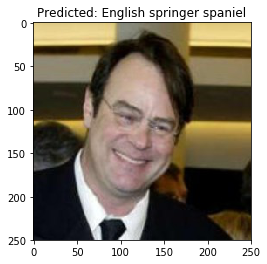

You resemble the dog breed 
English springer spaniel


Hi human!


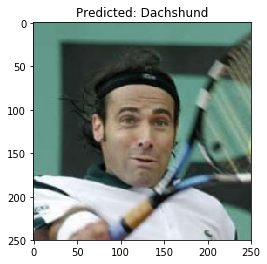

You resemble the dog breed 
Dachshund


Hi human!


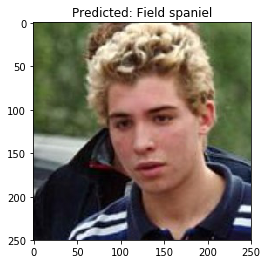

You resemble the dog breed 
Field spaniel


Hi Dog!


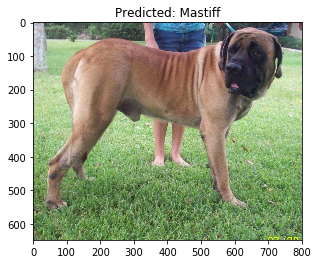

Your breed is 
Mastiff


Hi Dog!


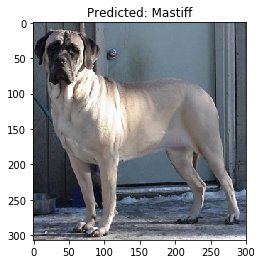

Your breed is 
Mastiff


Hi Dog!


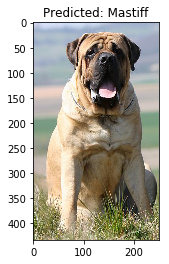

Your breed is 
Mastiff




In [109]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [112]:
files = ['./images/download.jpg', './images/download (1).jpg', './images/322868_1100-1100x628.jpg']
files2=['./images/76479dd91dc55c2768ddccfc30a4fbf5.png', './images/dog-landing-hero-lg.jpg']

Hi Dog!


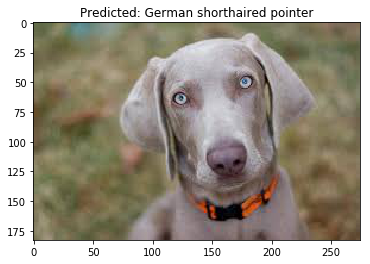

Your breed is 
German shorthaired pointer


Hi human!


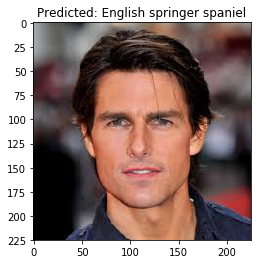

You resemble the dog breed 
English springer spaniel


Hi human!


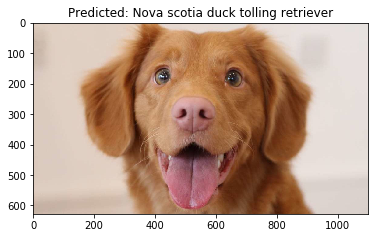

You resemble the dog breed 
Nova scotia duck tolling retriever


Nope, give me a dog or human face image.


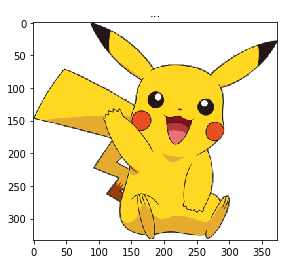

Try a different image!


Hi Dog!


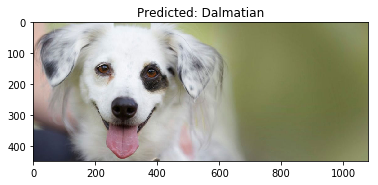

Your breed is 
Dalmatian




In [113]:
for file in np.hstack((files,files2)):
    run_app(file)